In [1]:
import pandas as pd
data = pd.read_csv('all.csv', encoding = 'latin-1')
data.describe()


,rank
count,1052.000000
mean,0.030418
std,0.049237
min,0.004290
25%,0.007040
50%,0.010505
75%,0.024223
max,0.351630


In [2]:
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re

def clean_argument(text): 
    argument_text = BeautifulSoup(text, "html5lib").get_text() 
    
    argument_text =  re.sub(r"http\S+", " ", argument_text)
    
    letters_only = re.sub("[^a-zA-Z]", " ", argument_text)  
    
    words = letters_only.lower().split()                
    
    return words
  

In [3]:
def clean_stopwords(words):
    stops = set(stopwords.words("english"))              
    meaningful_words = [w for w in words if not w in stops]  
    return meaningful_words
    

In [4]:
print(data['argument'][2] + "\n")
print(clean_argument(data['argument'][2]))


Americans spend billions on bottled water every year. Banning their sale would greatly hurt an already struggling economy. In addition to the actual sale of water bottles, the plastics that they are made out of, and the advertising on both the bottles and packaging are also big business. In addition to this, compostable waters bottle are also coming onto the market, these can be used instead of plastics to eliminate that detriment. Moreover, bottled water not only has a cleaner safety record than municipal water, but it easier to trace when a potential health risk does occur. <br/> (http://www.friendsjournal.org/bottled-water) (http://www.cdc.gov/healthywater/drinking/bottled/)

['americans', 'spend', 'billions', 'on', 'bottled', 'water', 'every', 'year', 'banning', 'their', 'sale', 'would', 'greatly', 'hurt', 'an', 'already', 'struggling', 'economy', 'in', 'addition', 'to', 'the', 'actual', 'sale', 'of', 'water', 'bottles', 'the', 'plastics', 'that', 'they', 'are', 'made', 'out', 'of'

In [5]:
data['rank'] = data['rank'].mul(100)
ranks = data['rank']
arguments = data['argument']
print(ranks)

0        0.650
1        6.618
2        0.558
3        0.773
4        0.536
5        5.050
6        1.192
7        1.281
8        0.740
9       13.561
10       0.588
11       1.054
12       7.473
13       0.727
14      15.209
15       1.181
16       0.658
17       0.577
18       0.586
19       0.649
20       1.352
21      27.961
22       1.264
23       0.659
24       0.880
25       4.877
26       0.698
27       2.645
28       0.469
29       0.607
         ...  
1022     1.738
1023     0.917
1024    13.076
1025     0.864
1026     1.608
1027     1.801
1028    10.760
1029     1.878
1030     0.859
1031     1.081
1032     2.007
1033     0.768
1034     1.078
1035     2.272
1036     0.892
1037     3.773
1038     0.846
1039    12.881
1040     0.791
1041     1.301
1042     5.231
1043     0.846
1044     1.763
1045     4.246
1046     1.013
1047     0.927
1048     2.086
1049     1.731
1050     4.434
1051     1.318
Name: rank, dtype: float64


In [6]:
def get_adj_endings(tagged_words):
    adjectivess = [(word, tag) for word, tag in tagged_words if tag in ('JJ', 'JJR', "JJS")]
    able = 0
    al = 0
    ful = 0
    ible = 0
    ic = 0
    ive = 0
    less = 0
    ous = 0
    ly = 0
    for adja in adjectivess:
        adj = adja[0] 
        if adj.endswith("able"):
            able+=1
        if adj.endswith("al"):
            al+=1  
        if adj.endswith("ful"):
            ful+=1
        if adj.endswith("ible"):
            ible+=1
        if adj.endswith("ic"):
            ic+=1
        if adj.endswith("ive"):
            ive+=1   
        if adj.endswith("less"):
            less+=1   
        if adj.endswith("ous"):
            ous+=1
        if adj.endswith("ly"):
            ly+=1   
    n = len(adjectivess) 
   
    if able !=0:
        Able.append(able*100/n)
    else: Able.append(0)
    if al!=0:
         Al.append(al*100/n)
    else: Al.append(0)
    if ful!=0:
         Ful.append(ful*100/n)
    else: Ful.append(0)
    if ible!=0:
         Ible.append(ible*100/n)
    else: Ible.append(0)
    if ic!=0:
         Ic.append(ic*100/n)  
    else: Ic.append(0)
    if ive!=0:
         Ive.append(ive*100/n)
    else: Ive.append(0)
    if less!=0:          
         Less.append(less*100/n)
    else: Less.append(0)
    if ous!=0:
         Ous.append(ous*100/n)
    else: Ous.append(0)
    if ly!=0:
         Ly.append(ly*100/n)
    else: Ly.append(0)
    return n

In [7]:
def getModals(words, lenght, all_md):
    can = 0
    could = 0
    might = 0
    may = 0
    must = 0
    should = 0
    will = 0
    would = 0
    shall = 0
    md = 0
    for a in words:
        if a == 'could':
            could+=1
        if a == 'can':
            can+=1    
        if a == 'might':
            might+=1
        if a == 'may':
            may+=1
        if a == 'should':
            should+=1 
        if a == 'will':
            will+=1    
        if a == 'would':
            would+=1    
        if a == 'shall':
            shall+=1   
        if a == 'must':
            must+=1    
    if can != 0 :        
        Can.append(can*100/lenght) 
    else: Can.append(0)   
    if could!= 0:
        Could.append(could*100/lenght)
    else: Could.append(0)
    if might != 0:    
         Might.append(might*100/lenght)
    else: Might.append(0) 
    if may != 0:
         May.append(may*100/lenght)
    else: May.append(0) 
    if must != 0:        
         Must.append(must*100/lenght)
    else: Must.append(0)
    if should != 0:
         Should.append(should*100/lenght)
    else: Should.append(0)   
    if will != 0:        
         Will.append(will*100/lenght)
    else: Will.append(0)
    if would != 0:
         Would.append(would*100/lenght)
    else: Would.append(0)    
    if shall != 0:
         Shall.append(shall*100/lenght)
    else: Shall.append(0)
    if all_md is not None:
        Uncert.append((all_md-will-must)*100/lenght)
        all_md =  all_md*100/lenght
    else:
        Uncert.append(0)
        all_md = 0
        
    return all_md

In [8]:
from nltk import pos_tag
from collections import Counter
Able = []
Al = []
Ful = []
Ible = []
Ic = []
Ive = []
Less = []
Ous = []
Ly = []
Can = []
Could = []
Might = []
May = []
Must = []
Should = []
Will = []
Would = []
Shall = []
Uncert = []
superlative_adj = []
superlative_adv = []
adj_ratios = []
advb_ratios = []
noun_ratios = []
verb_ratios = []
interj_ratios = []
pro_ratios = []
prep_ratios = []
art_ratios = []
modals_ratios = []
contextuality_measure = []

for argument in arguments:
    words = clean_argument(argument)
    tags = pos_tag(words)
    counts = Counter(tag for word, tag in tags)
    adjectives = get_adj_endings(tags)
    modals = getModals(words,len(words), counts.get('MD'))
    adverbs = len([(word, tag) for word, tag in tags if tag in ('RB', 'RBS', 'RBR','WRB')])
    verbs =len([(word, tag) for word, tag in tags if tag in ('VB', 'VBD', 'VBG',"VBN","VBP","VBZ")])/len(words)
    nouns = len([(word, tag) for word, tag in tags if tag in ('NN', 'NNS', 'NNP','NNPS')])/len(words)
    pronoun = len([(word, tag) for word, tag in tags if tag in ('PRP', 'PRP$','WP$','WP')])/len(words)
    preposition = len([(word, tag) for word, tag in tags if tag in ('IN')])/len(words)
    interjection = len([(word, tag) for word, tag in tags if tag in ('UH')])/len(words)
    articles = len([(word, tag) for word, tag in tags if tag in ('DT','PDT','WDT')])/len(words)
    sup_adv = len([(word, tag) for word, tag in tags if tag in ('RBS')])
    sup_adj = len([(word, tag) for word, tag in tags if tag in ('JJS')])
    
    if adverbs != 0 :
        superlative_adv.append(sup_adv/adverbs)   
    else: 
        superlative_adv.append(0)
    if adjectives !=0:
        superlative_adj.append(sup_adj/adjectives)
    else:superlative_adj.append(0)     
    
    adj_ratios.append(adjectives/len(words))
    advb_ratios.append(adverbs/len(words))
    noun_ratios.append(nouns)
    verb_ratios.append(verbs)
    pro_ratios.append(pronoun)
    prep_ratios.append(preposition)
    interj_ratios.append(interjection)
    art_ratios.append(articles)  
    modals_ratios.append(modals)
                   
       
        
    context_m = (nouns + (adjectives/len(words)) + preposition + articles - pronoun - verbs - (adverbs/len(words)) - interjection  + 100)*0.5
    contextuality_measure.append(context_m)
    
    
    
# print(contextuality_measure) 



In [9]:
features = pd.DataFrame(Able) 
features['Al'] = pd.Series(Al, index=features.index)
features['Ful'] = pd.Series(Ful, index=features.index)
features['Ible'] = pd.Series(Ible, index=features.index)
features['Ic'] = pd.Series(Ic, index=features.index)
features['Ive'] = pd.Series(Ive, index=features.index)
features['Less'] = pd.Series(Less, index=features.index)
features['Ous'] = pd.Series(Ous, index=features.index)
features['Ly'] = pd.Series(Ly, index=features.index)
features['Uncert'] = pd.Series(Uncert, index=features.index)
features['will'] = pd.Series(Will, index=features.index)
features['should'] = pd.Series(Should, index=features.index)
features['could'] = pd.Series(Could, index=features.index)
features['can'] = pd.Series(Can, index=features.index)
features['may'] = pd.Series(May, index=features.index)
features['might'] = pd.Series(Might, index=features.index)
features['shall'] = pd.Series(Shall, index=features.index)
features['would'] = pd.Series(Would, index=features.index)
features['must'] = pd.Series(Must, index=features.index)
features['superlative_adv'] = pd.Series(superlative_adv, index=features.index)
features['superlative_adj'] = pd.Series(superlative_adj, index=features.index)
features['adj'] = pd.Series(adj_ratios, index=features.index)
features['advb'] = pd.Series(advb_ratios, index=features.index)
features['noun'] = pd.Series(noun_ratios, index=features.index)
features['prep'] = pd.Series(prep_ratios, index=features.index)
features['pro'] = pd.Series(pro_ratios, index=features.index)
features['article'] = pd.Series(art_ratios, index=features.index)
features['interj'] = pd.Series(interj_ratios, index=features.index)
features['modals'] = pd.Series(modals_ratios, index=features.index)
features['contextuality'] = pd.Series(contextuality_measure, index=features.index)
features['ranks'] = pd.Series(ranks, index=features.index)
features.describe()


,0,Al,Ful,Ible,Ic,Ive,Less,Ous,Ly,Uncert,...,adj,advb,noun,prep,pro,article,interj,modals,contextuality,ranks
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,...,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,1.661941,8.057257,0.813478,1.314462,1.679129,1.121117,0.800499,1.131517,1.580278,1.959573,...,0.093940,0.073013,0.234339,0.108354,0.085406,0.088304,0.000135,2.351364,50.075347,3.041828
std,7.885834,18.478667,4.931916,7.979672,7.156629,5.541809,4.515914,6.607367,7.994769,2.550156,...,0.054173,0.048647,0.079626,0.046962,0.058075,0.048610,0.001516,2.740953,0.109700,4.923679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.615385,0.429000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.057143,0.040000,0.179703,0.078431,0.044444,0.057008,0.000000,0.000000,50.000000,0.704000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.020408,...,0.086957,0.068182,0.225289,0.108108,0.079646,0.085236,0.000000,1.694915,50.073223,1.050500
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.333333,...,0.121918,0.100000,0.278628,0.136364,0.125000,0.120000,0.000000,3.846154,50.139651,2.422250
max,100.000000,100.000000,50.000000,100.000000,66.666667,50.000000,50.000000,100.000000,100.000000,15.384615,...,0.315789,0.384615,0.812500,0.272727,0.315789,0.250000,0.022727,15.384615,50.437500,35.163000


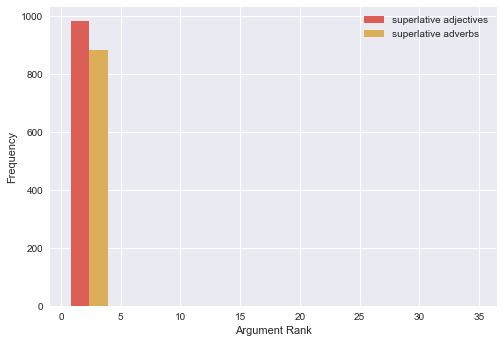

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set(color_codes=True)
sns.set_palette('hls',n_colors = 10)

plt.hist(x = [superlative_adj, superlative_adv], bins = np.linspace(min(ranks),max(ranks),10), label = ['superlative adjectives', 'superlative adverbs'])
#plt.xticks(np.around(ranks,1))
plt.xlabel('Argument Rank')
plt.ylabel('Frequency')
plt.legend()

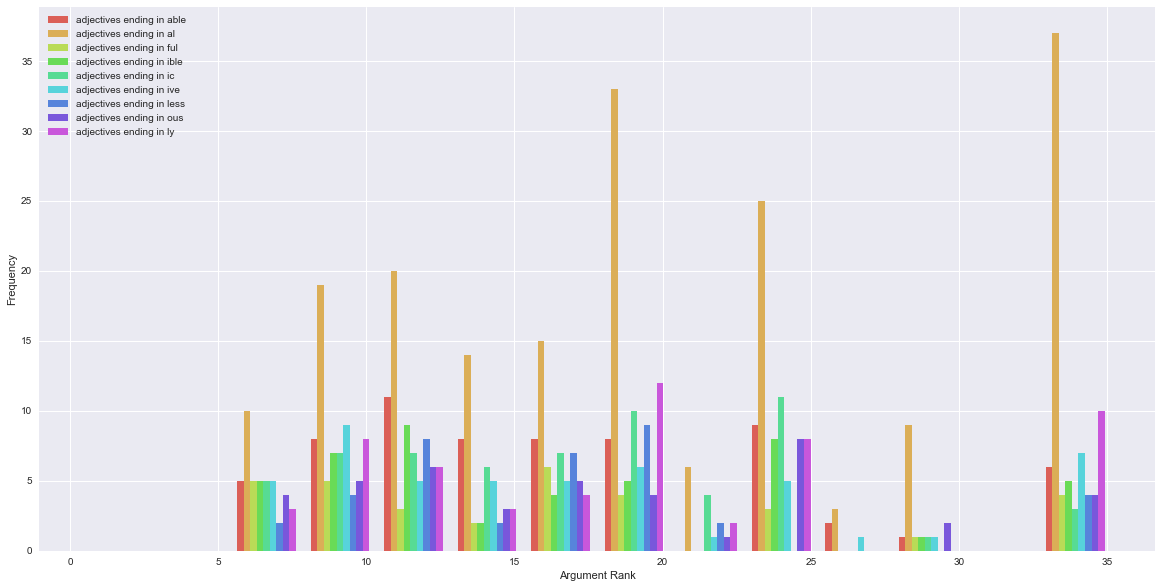

In [39]:
plt.figure(figsize=(20,10))
plt.hist(x = [Able, Al, Ful,Ible,Ic,Ive,Less,Ous,Ly], bins = np.linspace(min(ranks),max(ranks),15), label = ['adjectives ending in able','adjectives ending in al', 'adjectives ending in ful','adjectives ending in ible', 'adjectives ending in ic','adjectives ending in ive', 'adjectives ending in less','adjectives ending in ous', 'adjectives ending in ly'])
#plt.xticks(np.around(ranks,1))
plt.xlabel('Argument Rank')
plt.ylabel('Frequency')
plt.legend()

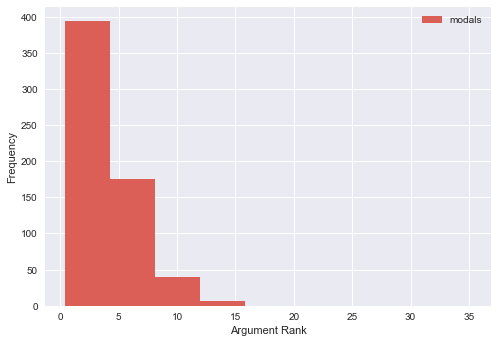

In [24]:
plt.hist(x = [modals_ratios], bins = np.linspace(min(ranks),max(ranks),10), label = ['modals'])
#plt.xticks(np.around(ranks,1))
plt.xlabel('Argument Rank')
plt.ylabel('Frequency')
plt.legend()

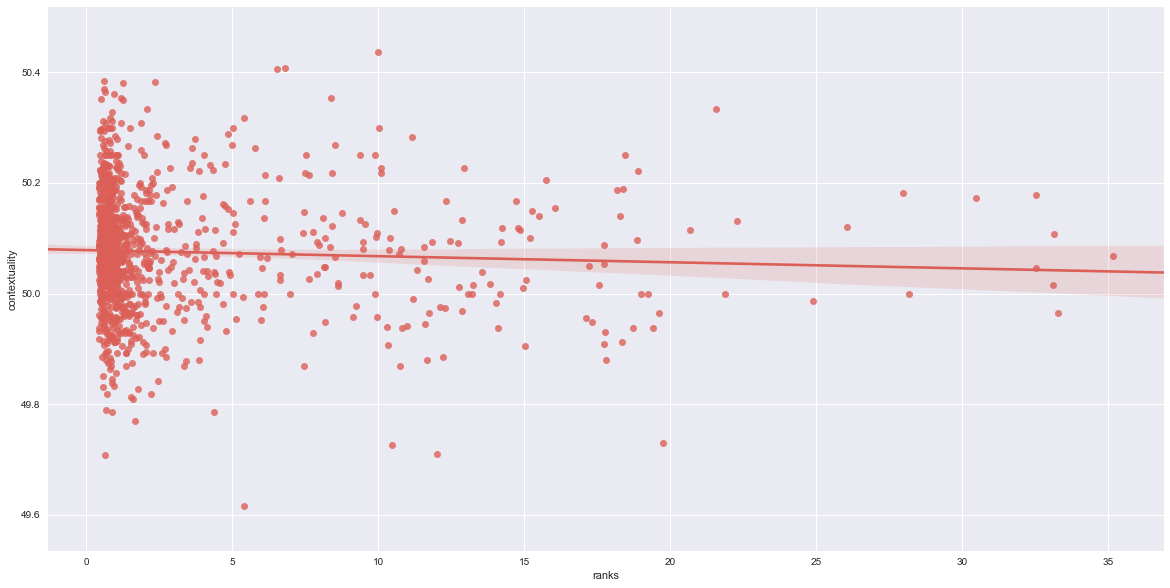

In [33]:
plt.figure(figsize=(20,10))
sns.regplot(x='ranks', y = 'contextuality', data=features)

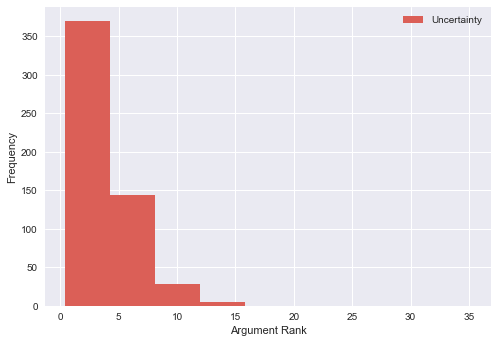

In [38]:
plt.hist(x = Uncert, bins = np.linspace(min(ranks),max(ranks),10), label = ['Uncertainty'])
#plt.xticks(np.around(ranks,1))
plt.xlabel('Argument Rank')
plt.ylabel('Frequency')
plt.legend()